# Construción de Chart Bars con Matplotlib
## Aplicación os datos da propagación do Coronavirus
### know-how by: <i> https://www.dunderdata.com/blog/create-a-bar-chart-race-animation-in-python-with-matplotlib </i>

In [13]:
#Importación de libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#NUM_PAISES=100
NUM_PAISES_BARRAS=20

In [14]:
#Importación de datos
URL_FALECEMENTOS = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
URL_CONTAXIOS = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
URL_RECUPERACIONS = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
allData=pd.read_csv(URL_FALECEMENTOS,usecols = lambda column : column not in ["Lat" , "Long"],keep_default_na=False)
allDataContaxios=pd.read_csv(URL_CONTAXIOS,usecols = lambda column : column not in ["Lat" , "Long"],keep_default_na=False)
allDataRecuperacions=pd.read_csv(URL_RECUPERACIONS,usecols = lambda column : column not in ["Lat" , "Long"],keep_default_na=False)
#Correximos os datos que veñen desagregados por provincias
allDataCor=allData.groupby('Country/Region').sum().reset_index()
allDataContaxiosCor=allDataContaxios.groupby('Country/Region').sum().reset_index()
allDataRecuperacionsCor=allDataRecuperacions.groupby('Country/Region').sum().reset_index()
allDataCor

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,218,219,220,227,235,246,249,257,265,270
1,Albania,0,0,0,0,0,0,0,0,0,...,32,32,33,33,33,33,33,33,33,33
2,Algeria,0,0,0,0,0,0,0,0,0,...,600,609,617,623,630,638,646,653,661,667
3,Andorra,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,51
4,Angola,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
184,Western Sahara,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,1,1,1,1
185,Yemen,0,0,0,0,0,0,0,0,0,...,42,44,49,53,57,65,77,80,84,87
186,Zambia,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7


### Gráfico do día de hoxe

In [15]:
_,numCols=allDataCor.shape
hoxe=allDataCor.columns[numCols-1]
hoxe
allDataCor[hoxe]

0      270
1       33
2      667
3       51
4        4
      ... 
183      3
184      1
185     87
186      7
187      4
Name: 6/2/20, Length: 188, dtype: int64

In [16]:
allDataMelt=allDataCor.melt(id_vars='Country/Region',var_name='Día',value_name='Valor')
allDataContaxiosMelt=allDataContaxiosCor.melt(id_vars='Country/Region',var_name='Día',value_name='Valor')
allDataRecuperacionsMelt=allDataRecuperacionsCor.melt(id_vars='Country/Region',var_name='Día',value_name='Valor')
allDataMelt


,Country/Region,Día,Valor
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0
...,...,...,...
24999,West Bank and Gaza,6/2/20,3
25000,Western Sahara,6/2/20,1
25001,Yemen,6/2/20,87
25002,Zambia,6/2/20,7


In [17]:
allDataMeltHoxe=allDataMelt.loc[(allDataMelt['Día']==hoxe)]
allDataContaxiosMeltHoxe=allDataContaxiosMelt.loc[(allDataContaxiosMelt['Día']==hoxe)]
allDataRecuperacionsMeltHoxe=allDataRecuperacionsMelt.loc[allDataRecuperacionsMelt['Día']==hoxe]
allDataMeltHoxe

,Country/Region,Día,Valor
24816,Afghanistan,6/2/20,270
24817,Albania,6/2/20,33
24818,Algeria,6/2/20,667
24819,Andorra,6/2/20,51
24820,Angola,6/2/20,4
...,...,...,...
24999,West Bank and Gaza,6/2/20,3
25000,Western Sahara,6/2/20,1
25001,Yemen,6/2/20,87
25002,Zambia,6/2/20,7


### 2 Bar Chart. Un con US e outro sen Us

In [18]:
allDataMeltHoxeSort=allDataMeltHoxe.sort_values(by=['Valor','Country/Region'],ascending=False,inplace=False)
selPaisesPrev=allDataMeltHoxeSort.head(NUM_PAISES_BARRAS)
selPaises=selPaisesPrev.sort_values(by=['Valor','Country/Region'],ascending=True)
selPaisesSenUS=selPaises.drop(selPaises.loc[selPaises['Country/Region']=='US'].index)
selPaises

,Country/Region,Día,Valor
24979,Switzerland,6/2/20,1920
24868,Ecuador,6/2/20,3438
24978,Sweden,6/2/20,4468
24989,Turkey,6/2/20,4585
24950,Peru,6/2/20,4634
24852,China,6/2/20,4638
24956,Russia,6/2/20,5031
24895,India,6/2/20,5829
24938,Netherlands,6/2/20,5986
24848,Canada,6/2/20,7476


### Gráfico con USA vertical

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

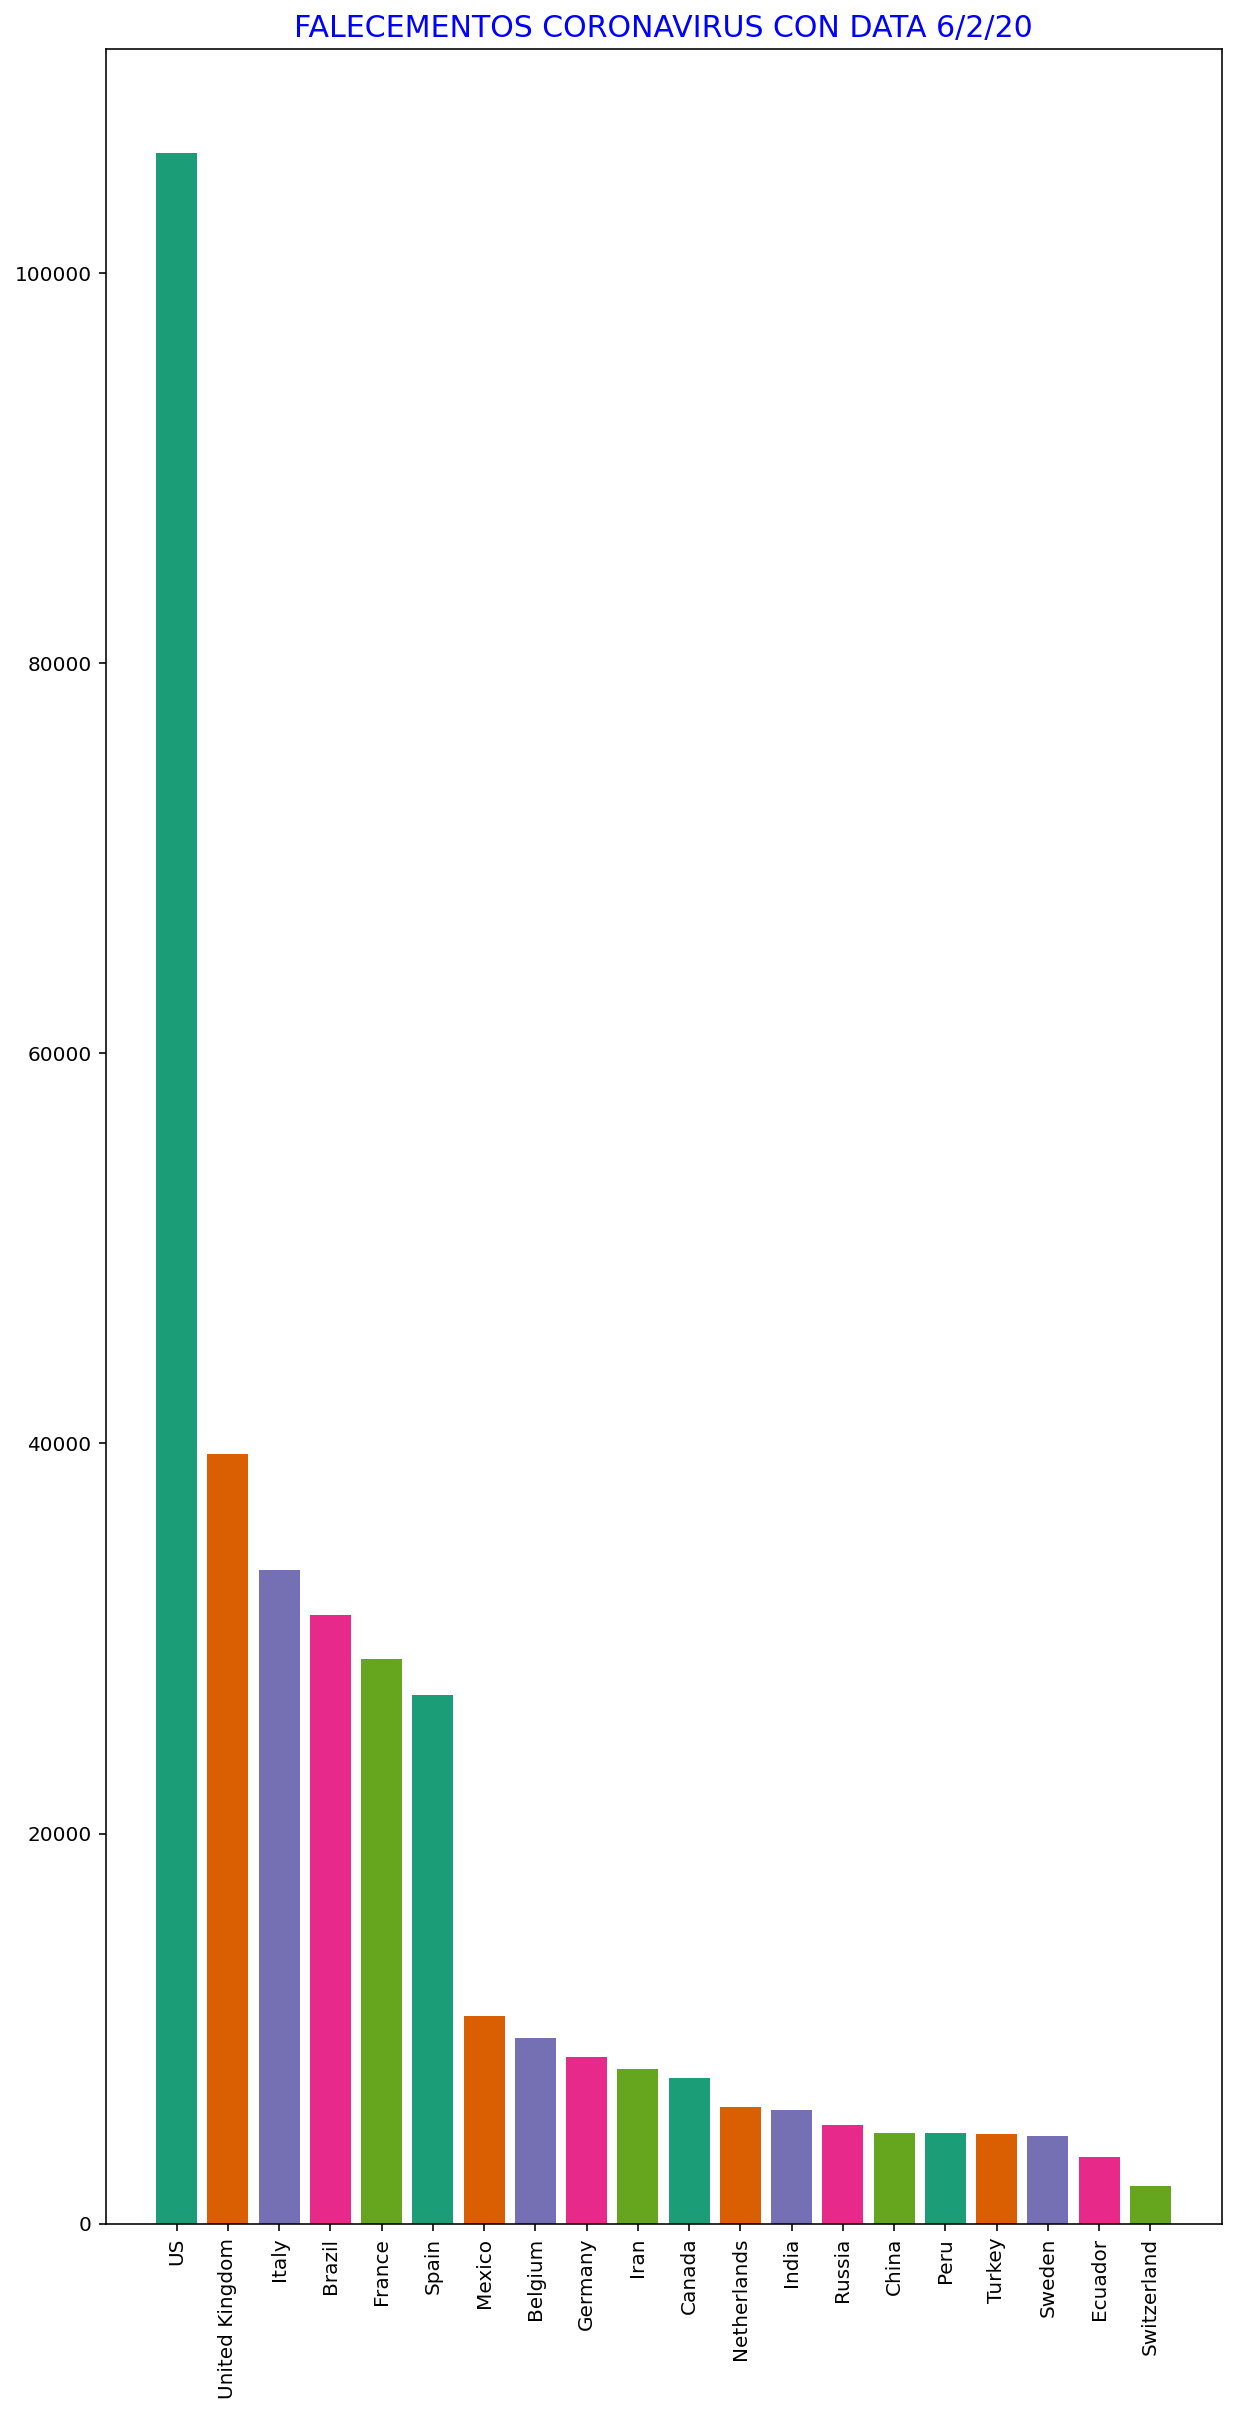

In [19]:
fig, ax = plt.subplots(figsize=(10, 20), dpi=144)
colors = plt.cm.Dark2(range(5))
y = selPaisesPrev['Country/Region']
height = selPaisesPrev['Valor']
ax.bar(y, height=height, color=colors)

#rects1 = ax.bar(x - width/2, men_means, width, label='Men')
ax.set_title("FALECEMENTOS CORONAVIRUS CON DATA "+ hoxe,size='15',color='b')
plt.xticks(rotation=90)


#### Algo de formateo

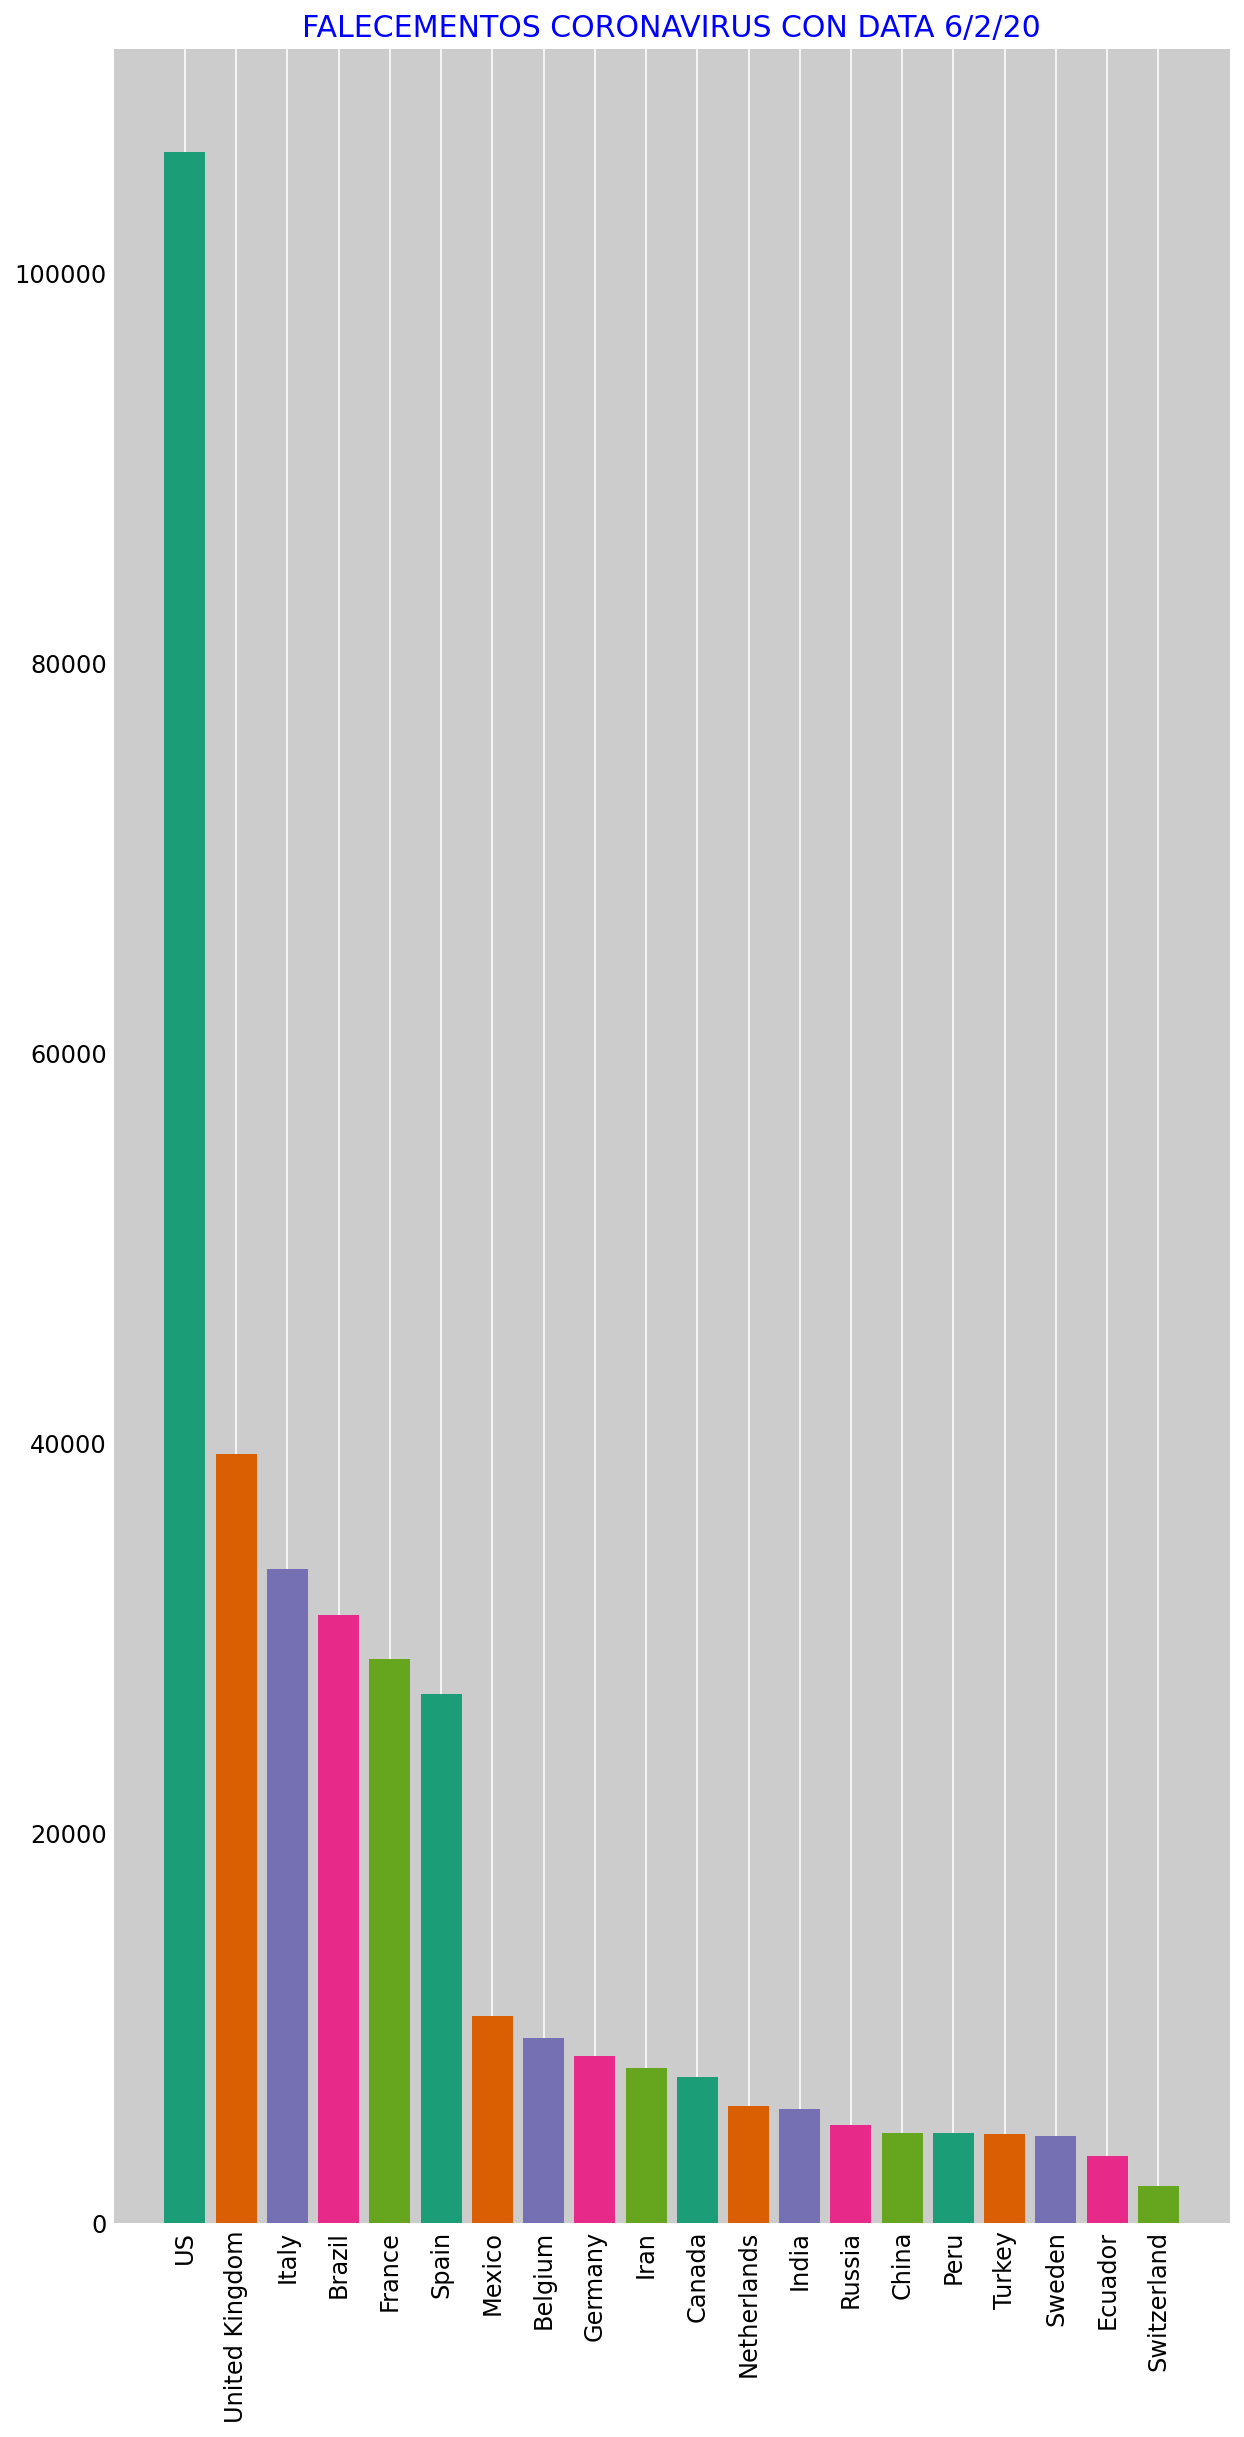

In [20]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=12, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

### Xuntamos nun mesmo gráfico, falecementos, contaxios e recuperacións

In [21]:
#Temos que tomar os mesmos paises para todos os datos
datosXuntos = pd.merge(selPaisesPrev, allDataContaxiosMeltHoxe, how='inner', on=['Country/Region', 'Country/Region'])
datosXuntos=pd.merge(datosXuntos, allDataRecuperacionsMeltHoxe, how='inner', on=['Country/Region', 'Country/Region'])
datosXuntos2=pd.DataFrame(datosXuntos) #Para que cree un novo marco auxiliar
datosXuntos.drop(datosXuntos.columns.difference(["Country/Region","Día_y","Valor_y"]), 1, inplace=True)
datosXuntos.rename(columns={'Country/Region':'Country/Region','Día_y':'Día','Valor_y':'Valor'},inplace=True)
datosContaxios=datosXuntos
datosXuntos2.drop(datosXuntos2.columns.difference(["Country/Region","Día","Valor"]), 1, inplace=True)
datosXuntos2.rename(columns={'Country/Region':'Country/Region','Día_y':'Día','Valor_y':'Valor'},inplace=True)
datosRecuperacions=datosXuntos2


#### Proba con brokeaxes

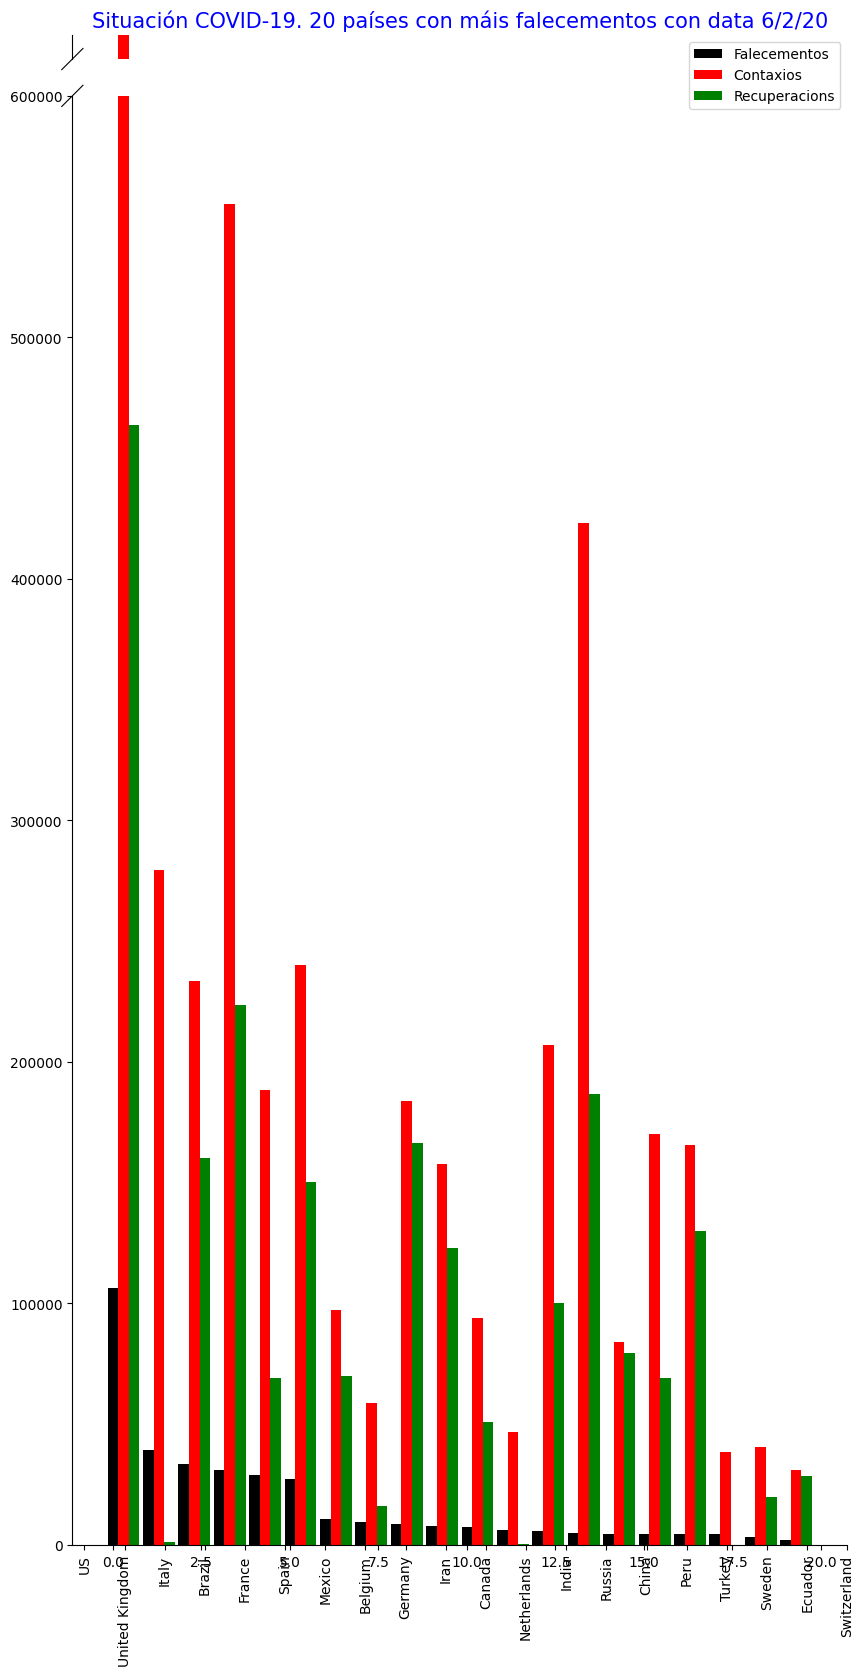

In [48]:
from brokenaxes import brokenaxes
fig = plt.figure(figsize=(10,20),dpi=100)
bax = brokenaxes( ylims=((0, 600000), (np.amax(datosContaxios['Valor'])-20000, np.amax(datosContaxios['Valor'])-10000)),hspace=0.05)
labels = selPaisesPrev['Country/Region']
width=0.3

r1 = np.arange(len(labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

bar1 = bax.bar(r1,selPaisesPrev['Valor'],width=width,label='Falecementos', color='k')
bar2 = bax.bar(r2, datosContaxios['Valor'],  width=width,label='Contaxios', color='r')
bar3 = bax.bar(r3, datosRecuperacions['Valor'],  width=width,label='Recuperacions',color='g')
bax.set_title("Situación COVID-19. 20 países con máis falecementos con data "+ hoxe,size='15',color='b')
plt.xticks(None)
plt.xticks([r + width for r in range(len(labels))], labels,rotation=90)
bax.legend()
#nice_axes(bax)

#### Sen brokenaxes

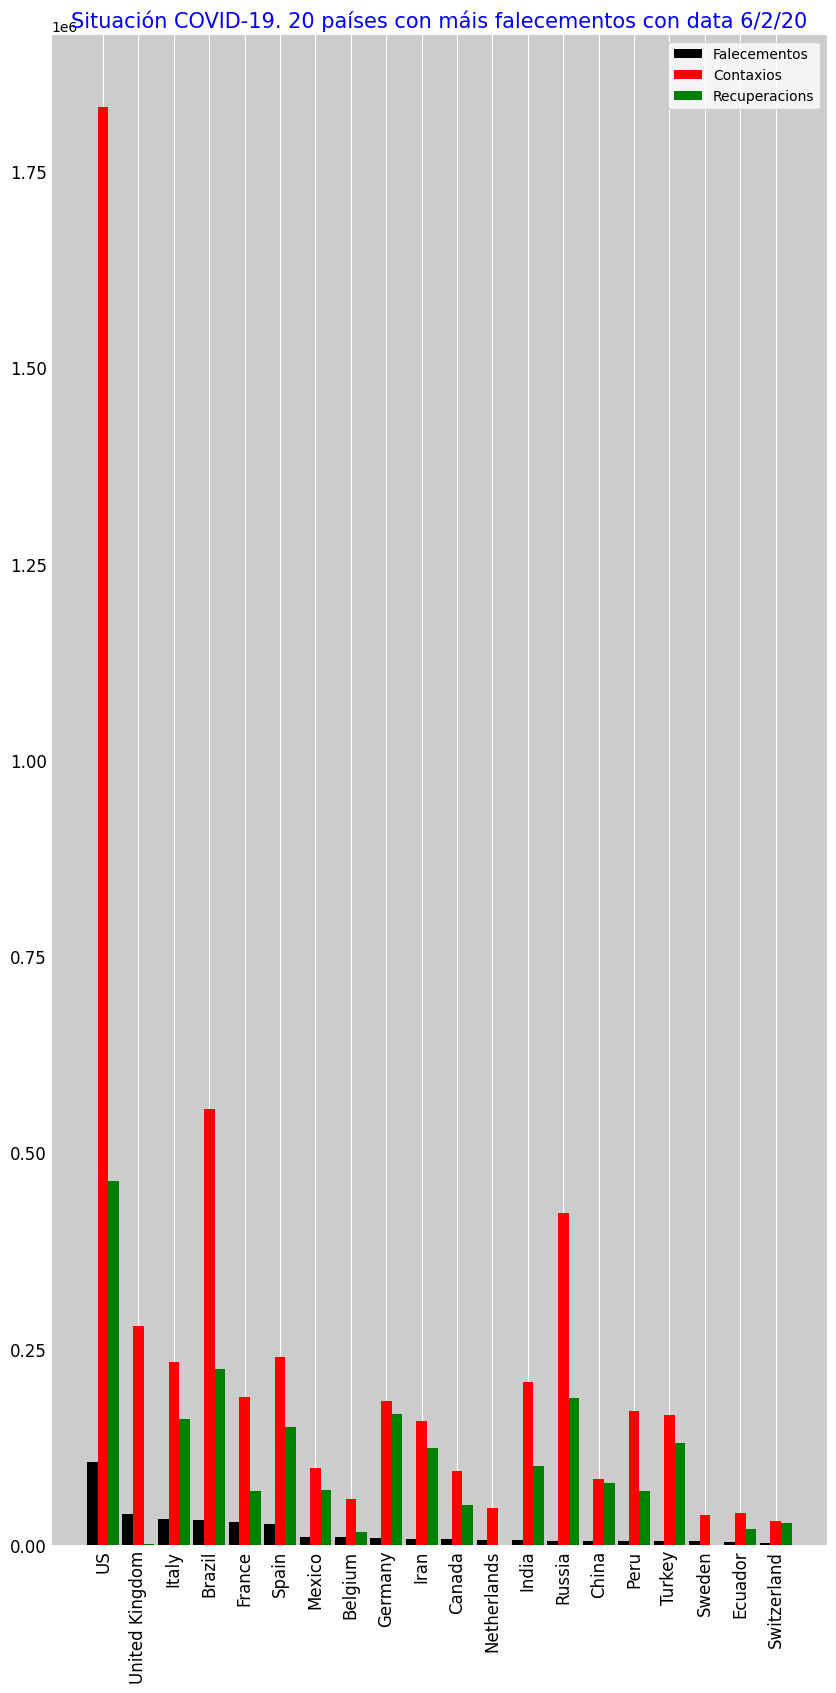

In [46]:

fig, ax = plt.subplots(figsize=(10,20),dpi=100)
labels = selPaisesPrev['Country/Region']
width=0.3

r1 = np.arange(len(labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

bar1 = ax.bar(r1,selPaisesPrev['Valor'],width=width,label='Falecementos', color='k')
bar2 = ax.bar(r2, datosContaxios['Valor'],  width=width,label='Contaxios', color='r')
bar3 = ax.bar(r3, datosRecuperacions['Valor'],  width=width,label='Recuperacions',color='g')
ax.set_title("Situación COVID-19. 20 países con máis falecementos con data "+ hoxe,size='15',color='b')
plt.xticks(None)
plt.xticks([r + width for r in range(len(labels))], labels,rotation=90)
ax.legend()
nice_axes(ax)

### Gráfico de Hoxe con USA / sen USA

Text(0.5, 1.0, 'FALECEMENTOS CORONAVIRUS CON DATA 6/2/20 (sen USA)')

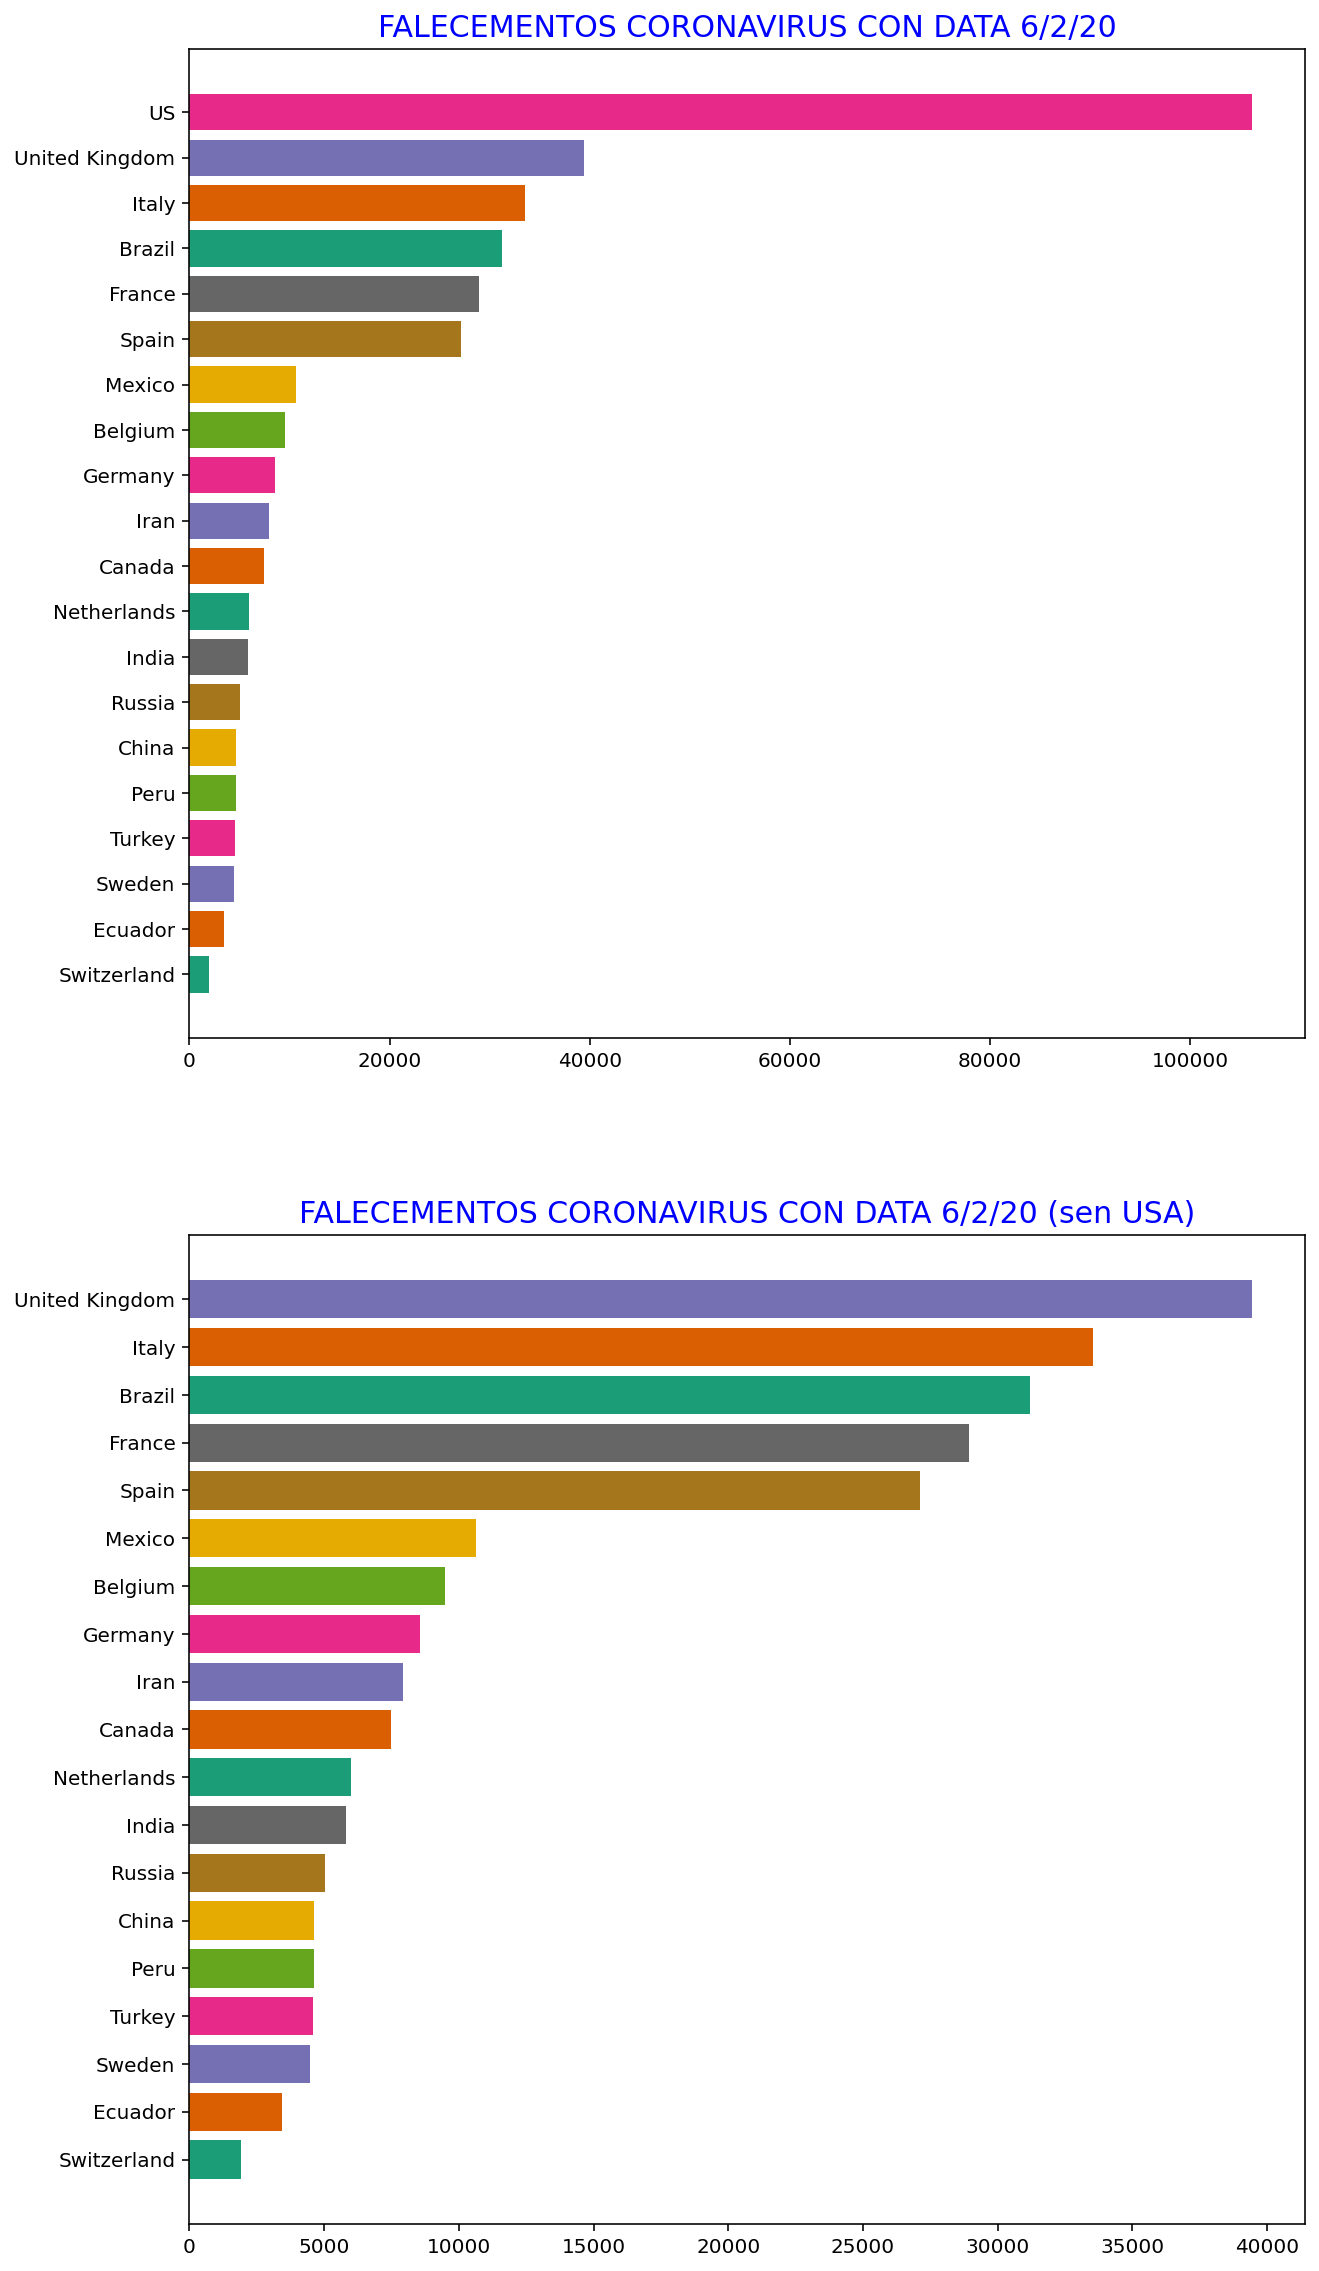

In [23]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10, 20), dpi=144)
colors = plt.cm.Dark2(range(8))
y = selPaises['Country/Region']
width = selPaises['Valor']
ax1.barh(y=y, width=width, color=colors)
y = selPaisesSenUS['Country/Region']
width = selPaisesSenUS['Valor']
ax2.barh(y=y, width=width, color=colors)
ax1.set_title("FALECEMENTOS CORONAVIRUS CON DATA "+ hoxe,size='15',color='b')
ax2.set_title("FALECEMENTOS CORONAVIRUS CON DATA "+ hoxe+" (sen USA)",size='15',color='b')

### Estilización dos eixos

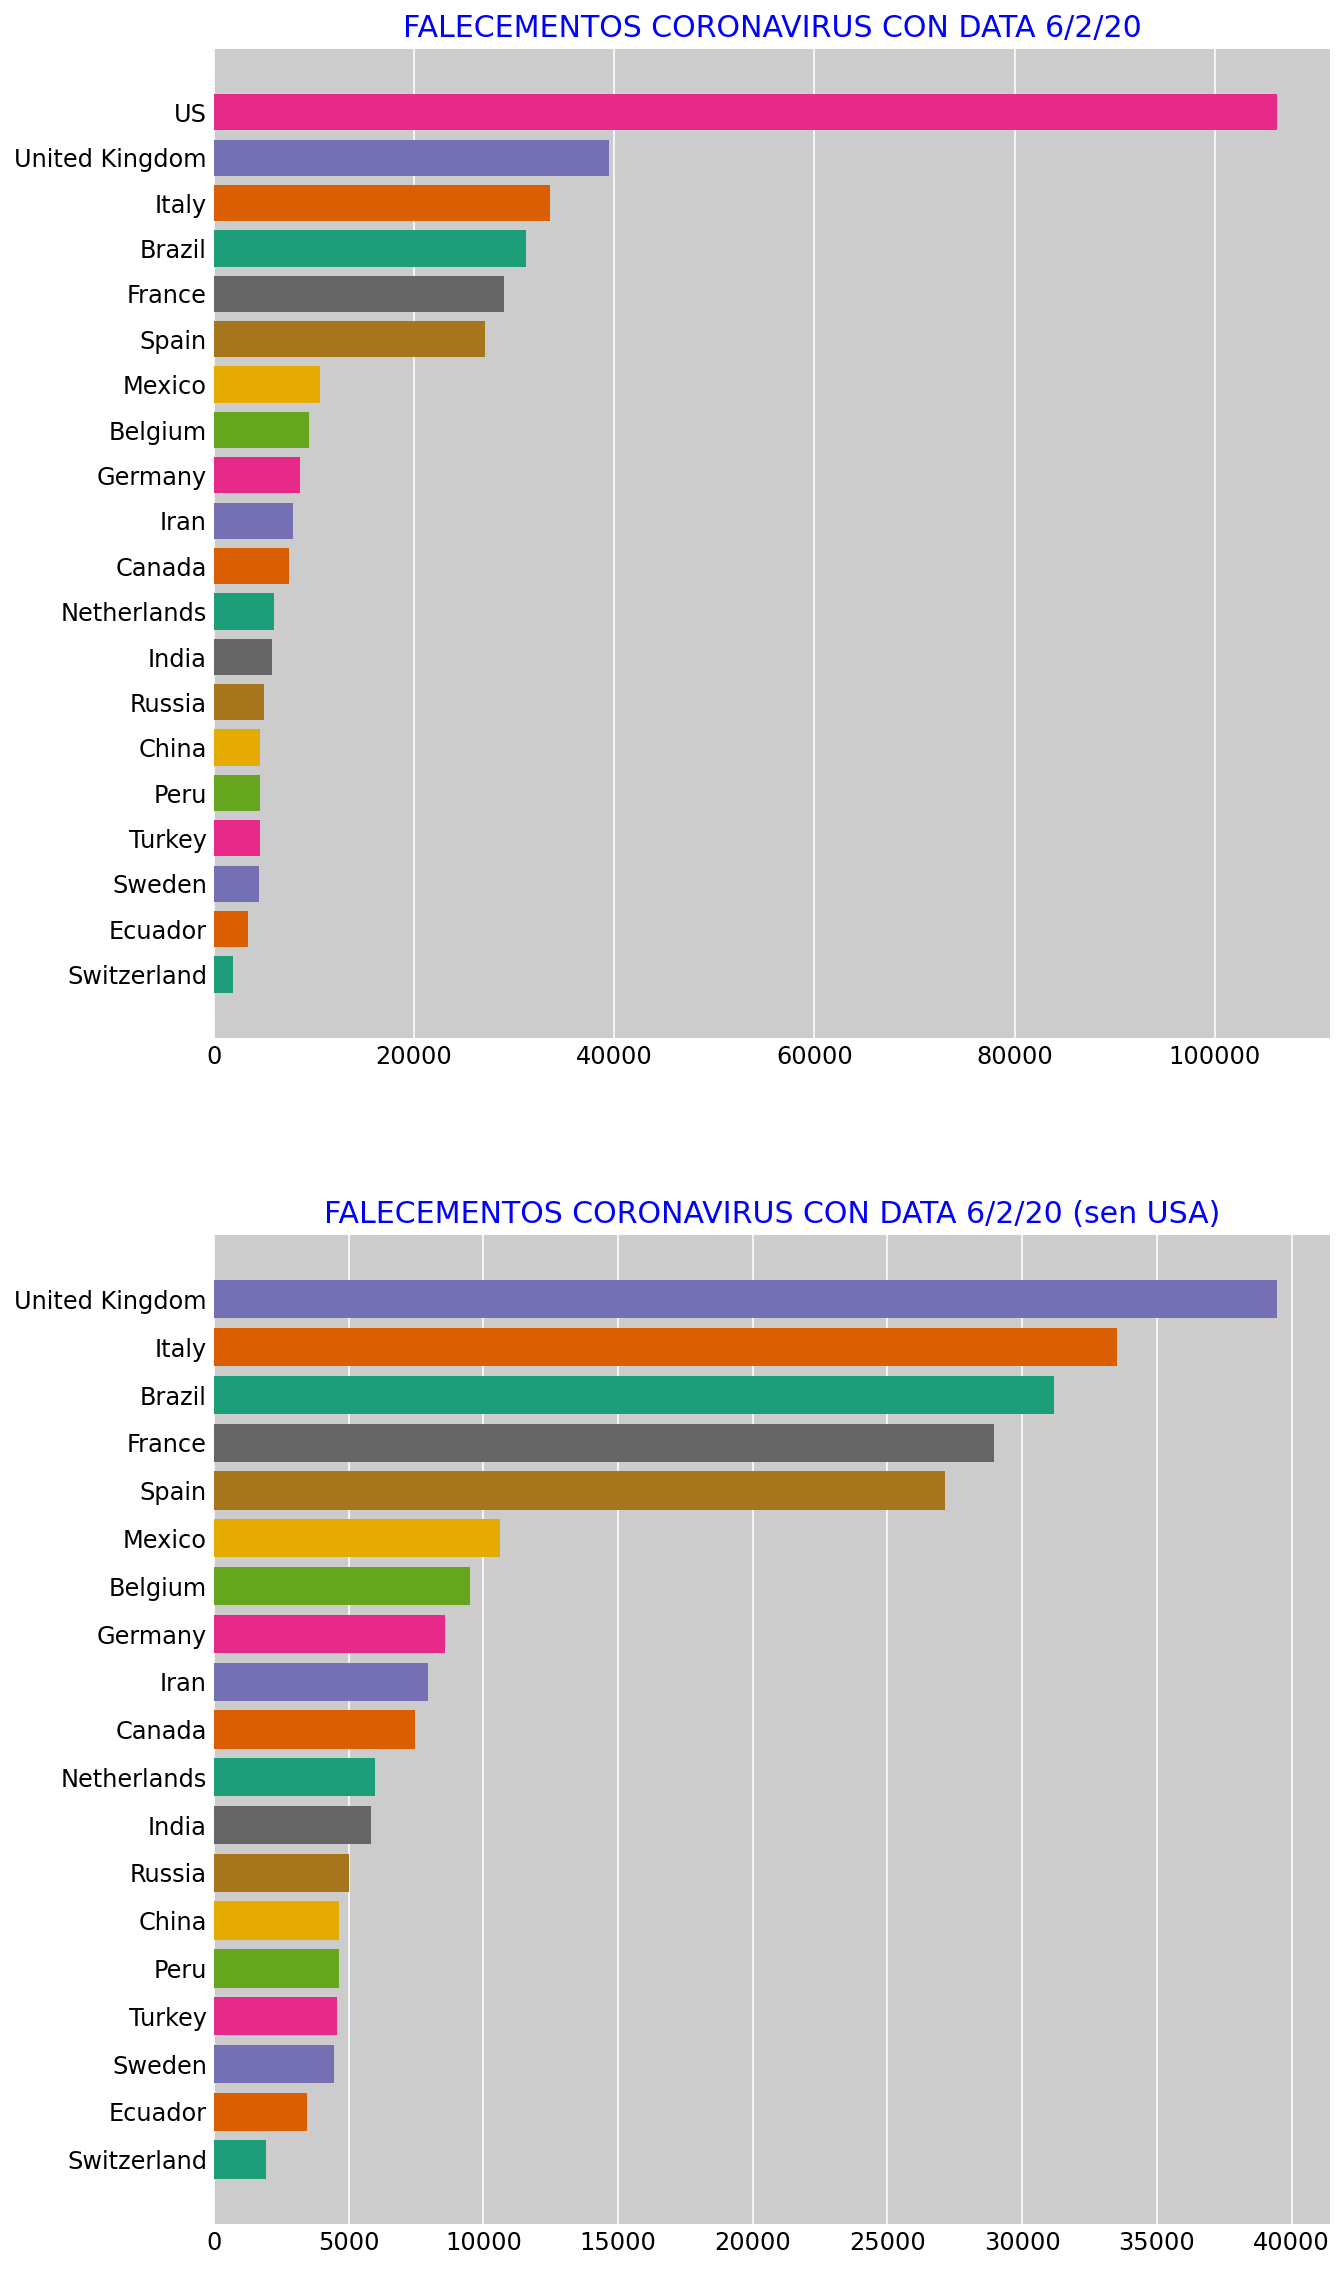

In [24]:
nice_axes(ax1)
nice_axes(ax2)
fig

### Gráfico con 3 días seguidos

#### Recuperamos as datas

In [25]:
from datetime import datetime
from datetime import timedelta
dataHoxe = datetime.strptime(hoxe, '%m/%d/%y')
dataOnte=dataHoxe-timedelta(1)
dataAntonte=dataHoxe-timedelta(2)
onte=dataOnte.strftime('%-m/%-d/%y')
antonte=dataAntonte.strftime('%-m/%-d/%y')
hoxe,onte,antonte

('6/2/20', '6/1/20', '5/31/20')

#### Preparamos os datos para a comparación

In [26]:
#Temos allDataMeltHoxe, e destes escollemos os primeiros selPaises


allDataMeltOnte=allDataMelt.loc[(allDataMelt['Día']==onte)]
allDataMeltAntonte=allDataMelt.loc[(allDataMelt['Día']==antonte)]

#onte
datosXuntos = pd.merge(selPaises, allDataMeltOnte, how='inner', on=['Country/Region', 'Country/Region'])
datosXuntos.rename(columns={'Country/Region':'Country/Region',"Día_x":"Día_x","Valor_x":"Valor_x",
                            "Día_y":"Día","Valor_y":"Valor",},inplace=True)
compHoxeOnte=pd.DataFrame(datosXuntos)
datosXuntos.drop(datosXuntos.columns.difference(['Country/Region','Día','Valor']), 1,inplace=True)
selPaisesOnte=datosXuntos
#antonte
datosXuntos = pd.merge(selPaises, allDataMeltAntonte, how='inner', on=['Country/Region', 'Country/Region'])
datosXuntos.rename(columns={'Country/Region':'Country/Region',"Día_x":"Día_x","Valor_x":"Valor_x",
                            "Día_y":"Día","Valor_y":"Valor",},inplace=True)
datosXuntos.drop(datosXuntos.columns.difference(['Country/Region','Día','Valor']), 1,inplace=True)
selPaisesAntonte=datosXuntos
selPaisesAntonte

,Country/Region,Día,Valor
0,Switzerland,5/31/20,1920
1,Ecuador,5/31/20,3358
2,Sweden,5/31/20,4395
3,Turkey,5/31/20,4540
4,Peru,5/31/20,4506
5,China,5/31/20,4638
6,Russia,5/31/20,4693
7,India,5/31/20,5408
8,Netherlands,5/31/20,5975
9,Canada,5/31/20,7374


### Alerta cos 5 países que máis aumentaron contaxios ou falecementos

In [27]:
compHoxeOnte.rename(columns={'Country/Region':'País',"Día_x":"hoxe","Valor_x":"valorHoxe",
                            "Día":"onte","Valor":"valorOnte",},inplace=True)
compHoxeOnte['crecemento%']=np.round((compHoxeOnte['valorHoxe']-compHoxeOnte['valorOnte'])*100/compHoxeOnte['valorOnte'],2)
compHoxeOnte.sort_values(by=['crecemento%','País'],ascending=False,inplace=True)
compHoxeOnte


,País,hoxe,valorHoxe,onte,valorOnte,crecemento%
13,Mexico,6/2/20,10637,6/1/20,10167,4.62
16,Brazil,6/2/20,31199,6/1/20,29937,4.22
7,India,6/2/20,5829,6/1/20,5608,3.94
6,Russia,6/2/20,5031,6/1/20,4849,3.75
1,Ecuador,6/2/20,3438,6/1/20,3358,2.38
2,Sweden,6/2/20,4468,6/1/20,4403,1.48
19,US,6/2/20,106180,6/1/20,105149,0.98
9,Canada,6/2/20,7476,6/1/20,7404,0.97
18,United Kingdom,6/2/20,39452,6/1/20,39127,0.83
10,Iran,6/2/20,7942,6/1/20,7878,0.81


### Alerta Coas Resurreccións

In [28]:
datosResurreccions=compHoxeOnte.loc[(compHoxeOnte['crecemento%']<0)]
datosResurreccions


,País,hoxe,valorHoxe,onte,valorOnte,crecemento%


### Alerta cos paises que levan dous días sen falecementos (entre os 100 primeiros)

In [29]:
compHoxeOnte['antonte']=antonte
compHoxeOnte['valorAntonte']=selPaisesAntonte['Valor']
senFalecementos=pd.DataFrame(compHoxeOnte.loc[(compHoxeOnte['valorHoxe']==compHoxeOnte['valorAntonte'])])
senFalecementos.drop(senFalecementos.columns.difference(['País','valorHoxe','valorAntonte']), 1,inplace=True)
senFalecementos.sort_values(by=['valorHoxe','País'],ascending=False,inplace=True)
senFalecementos

,País,valorHoxe,valorAntonte
14,Spain,27127,27127
5,China,4638,4638
0,Switzerland,1920,1920


### Multrigráfico de barras

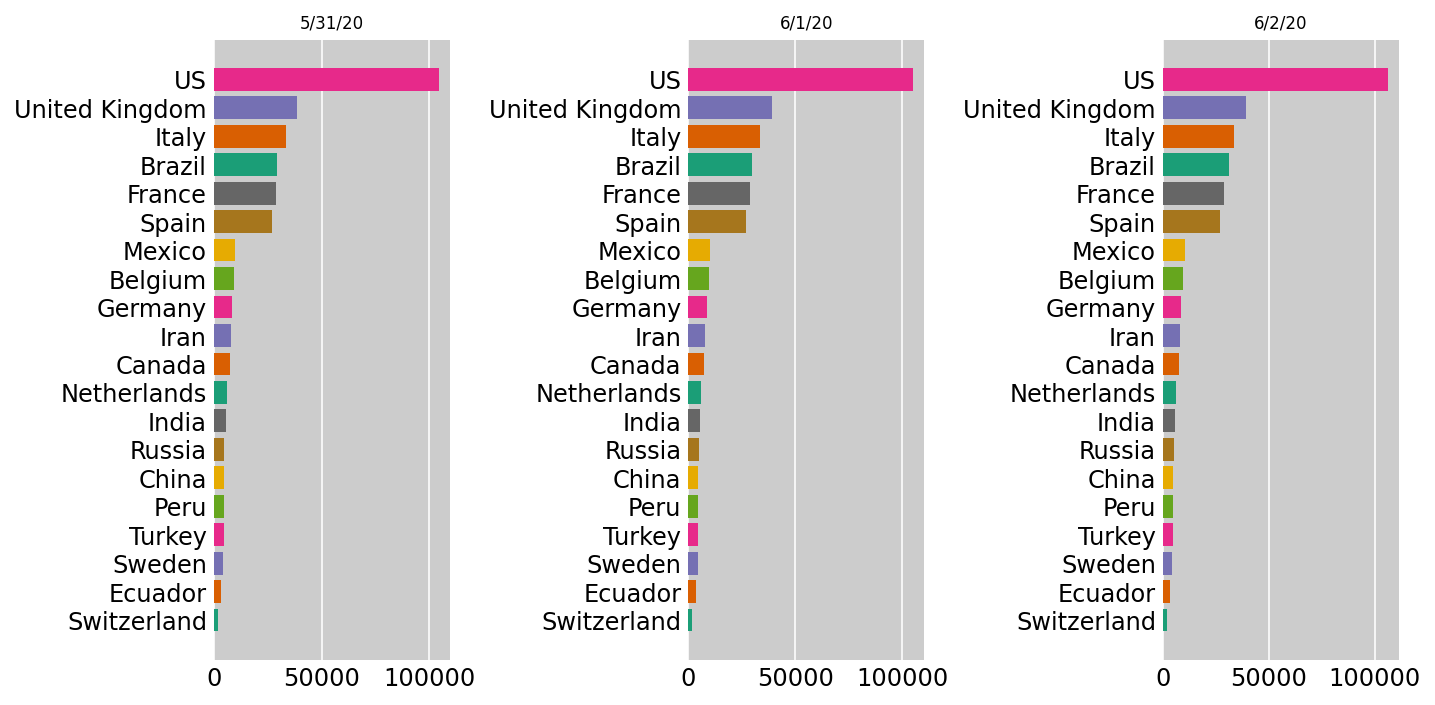

In [30]:



fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(10, 5), 
                             dpi=144, tight_layout=True)
dates = [antonte, onte, hoxe]
for ax, date in zip(ax_array, dates):
    y = selPaises['Country/Region']
    if date==hoxe:
        s=selPaises
    elif date==onte:
        s=selPaisesOnte
    else:
        s=selPaisesAntonte
        
    width = s['Valor']
    ax.barh(y=y, width=width, color=colors)
    tick_label=s['Valor']
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)